# (Effect of Arrival Delay on Arrival Cancelled of flights)
## by (Justus Ilemobayo)

## Investigation Overview

> The goal was to look at the different features to determine which of them most affects the flight .

## Dataset Overview

> This dataset reports fights in the United States,
including carriers, arrival and departure delays, for 2019.

In [29]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [11]:
# load in the dataset into a pandas dataframe
flight = pd.read_csv("airline_delay_causes_final.csv")

In [12]:
flight.drop(columns =['Unnamed: 21'], axis=1, inplace =True)

In [13]:
new_cols = []
for i in flight.keys():
    #strip()
    i.strip()
    new_cols.append(i.strip())
print (new_cols)
    

['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']


In [14]:
flight.columns =new_cols

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Arrival Cancelled

> Here we see that most values range between 0 - 100 minutes.  The distribution is right skewed

Text(0, 0.5, 'Count')

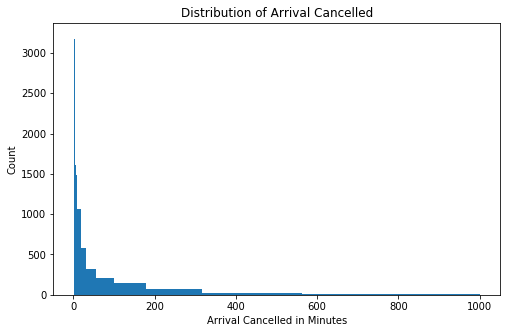

In [15]:

log_binsize =0.25
bins =10 ** np.arange(0, np.log10(flight['arr_cancelled'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = flight, x = 'arr_cancelled' , bins=bins);

plt.title("Distribution of Arrival Cancelled")
plt.xlabel("Arrival Cancelled in Minutes")
plt.ylabel("Count")


## Count of Carrier Name

> The plot below shows the count of flight by each carrier throughout 2019. SkyWest Airlines Inc. had the highest number of flight.

Text(0.5, 1.0, 'Count of Carrier Name')

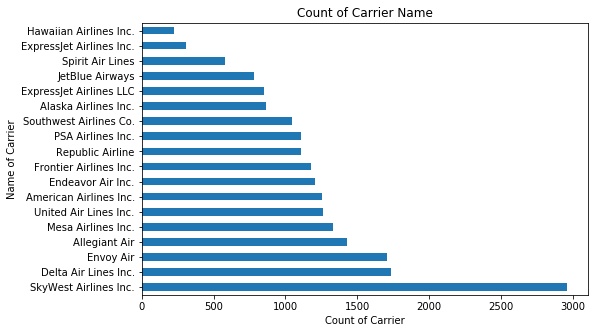

In [16]:
plt.figure(figsize=[8, 5])

flight.carrier_name.value_counts().plot(kind='barh')
plt.ylabel('Name of Carrier')
plt.xlabel("Count of Carrier")
plt.title("Count of Carrier Name")

## Top 10 Airport based on number of flights 

> Pittsburgh International had the highest number of flight in 2019

Text(0.5, 1.0, 'Top ten airport based on number of flights')

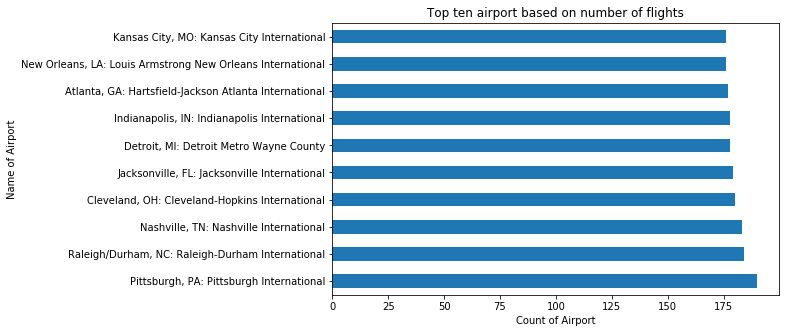

In [17]:
plt.figure(figsize=[8, 5])

flight.airport_name.value_counts().iloc[:10].plot(kind='barh')

plt.ylabel('Name of Airport')
plt.xlabel("Count of Airport")
plt.title("Top ten airport based on number of flights")

## Mean Arrival delay time for each Carrier

> The plot show the average delay time for each carrier

Text(0.5, 1.0, 'Average Arrival delay time for each Carrier')

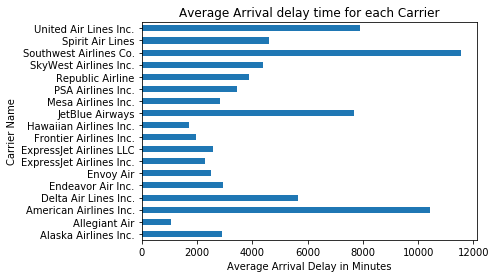

In [26]:
flight.groupby('carrier_name').mean()['arr_delay'].plot(kind='barh')
plt.xlabel("Average Arrival Delay in Minutes")
plt.ylabel("Carrier Name")
plt.title("Average Arrival delay time for each Carrier")

## Mean Arrival delay time for each Month

> The plot show the average delay time for each month. From the plot June has the highest delay time

Text(0.5, 1.0, 'Average Arrival delay time for each Month')

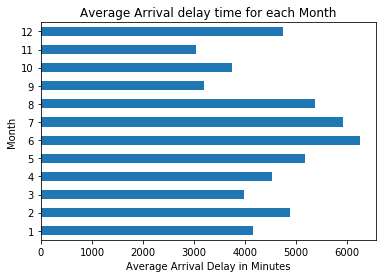

In [27]:
flight.groupby('month').mean()['arr_delay'].plot(kind='barh')
plt.xlabel("Average Arrival Delay in Minutes")
plt.ylabel("Month")
plt.title("Average Arrival delay time for each Month")

## Correlation Matrix between different features.

> This shows how the various features are correlated to each other. Most of the features that had to do with delay were highly correlated. This means that an increase in delay in one feature leads to an increase in delay in the other feature

Text(0.5, 1, 'Correlation Matrix between the Features')

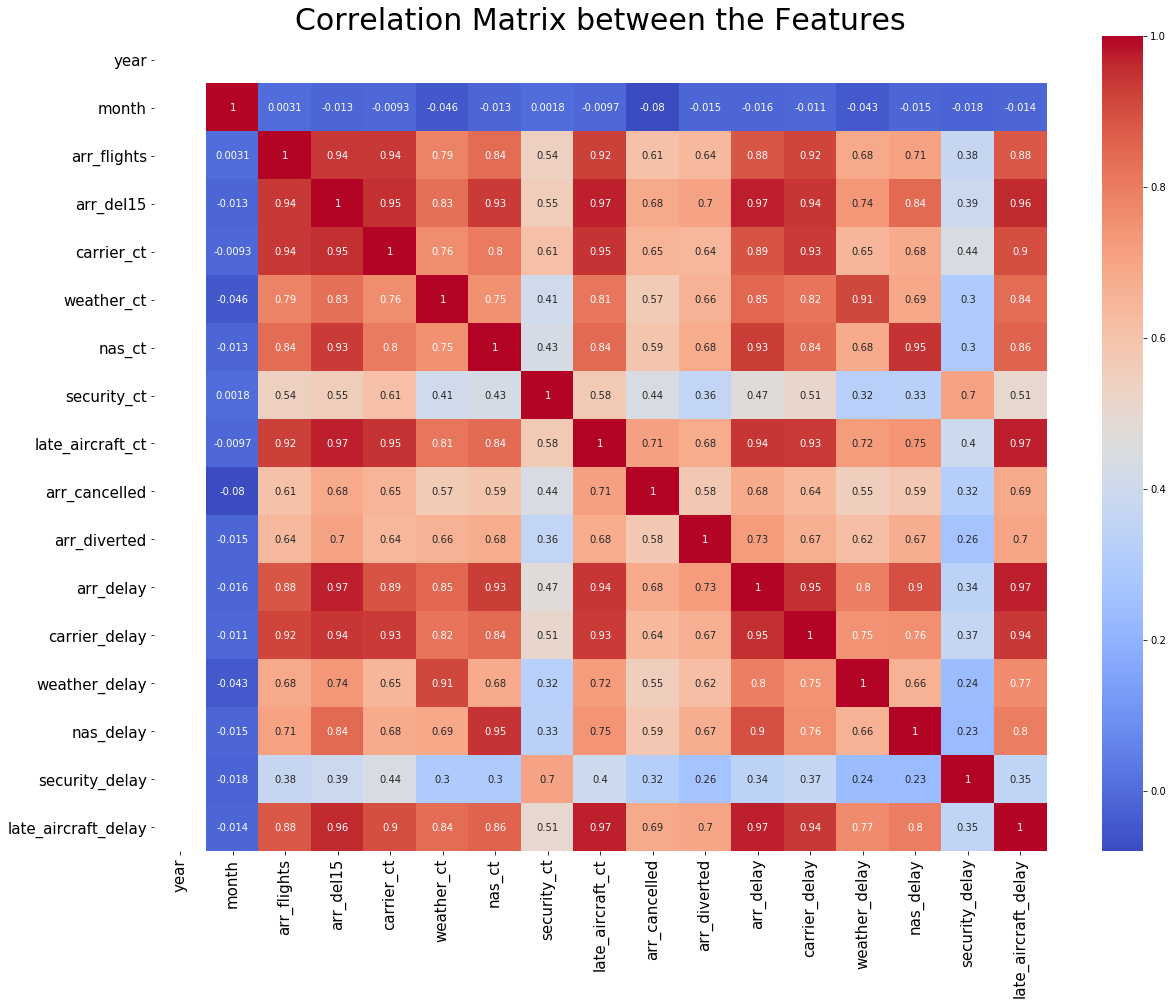

In [32]:
flights_cor = flight.corr()
plt.figure(figsize=(20,15))
sb.heatmap(flights_cor, annot = True, cmap='coolwarm')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Correlation Matrix between the Features", fontsize=30)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!